In [1]:
%%capture

import pandas as pd
import numpy as np

!pip install seqeval

from seqeval.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from seqeval.scheme import IOB2
from tqdm import tqdm

In [2]:
test_mention_classification_preds_biobert = pd.read_csv('../input/predictions/test_rec_prediction_lstm_biobert.csv')
train_mention_classification_preds_biobert = pd.read_csv('../input/predictions/train_rec_prediction_lstm_biobert.csv')
test_mention_classification_preds_scibert = pd.read_csv('../input/predictions/test_rec_prediction_lstm_scibert.csv')
train_mention_classification_preds_scibert = pd.read_csv('../input/predictions/train_rec_prediction_lstm_scibert.csv')
train_mention_classification_preds_coder = pd.read_csv('../input/predictions/train_rec_prediction_lstm.csv')
test_mention_classification_preds_coder = pd.read_csv('../input/predictions/test_rec_prediction_lstm.csv')
train_mention_classification_preds_umlsbert = pd.read_csv('../input/predictions/train_rec_prediction_lstm_umlsbert.csv')
test_mention_classification_preds_umlsbert = pd.read_csv('../input/predictions/test_rec_prediction_lstm_umlsbert.csv')

train_mention_detection_preds_coder = pd.read_csv('../input/predictions/train_det_prediction_lstm_coder.csv')
test_mention_detection_preds_coder = pd.read_csv('../input/predictions/test_det_prediction_lstm_coder.csv')
train_mention_detection_preds_scibert = pd.read_csv('../input/predictions/train_det_prediction_scibert.csv')
test_mention_detection_preds_scibert = pd.read_csv('../input/predictions/test_det_prediction_scibert.csv')

test_nn_classification_preds_coder = pd.read_csv('../input/predictions/test_nn_prediction.csv')
train_nn_classification_preds_coder = pd.read_csv('../input/predictions/train_nn_prediction.csv')

In [3]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(train_nn_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Predicted Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:09, 9998.78it/s] 


                                     precision    recall  f1-score   support

               anatomical_structure      0.594     0.526     0.558      1435
                          bacterium      0.854     0.717     0.779       106
                  biologic_function      0.642     0.558     0.597      2976
biomedical_occupation_or_discipline      0.246     0.368     0.295        38
                     body_substance      0.557     0.557     0.557        79
                        body_system      0.636     0.583     0.609        24
                           chemical      0.597     0.671     0.632      2586
                 clinical_attribute      0.258     0.270     0.264       115
                          eukaryote      0.481     0.612     0.539       461
                            finding      0.337     0.471     0.393      1093
                               food      0.426     0.460     0.442        50
               health_care_activity      0.460     0.471     0.465      176

In [4]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(test_nn_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Predicted Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:27, 9814.61it/s] 


                                     precision    recall  f1-score   support

               anatomical_structure      0.464     0.437     0.450      3768
                          bacterium      0.741     0.548     0.630       449
                  biologic_function      0.597     0.546     0.570      8102
biomedical_occupation_or_discipline      0.271     0.383     0.317       196
                     body_substance      0.483     0.604     0.537       212
                        body_system      0.568     0.236     0.333        89
                           chemical      0.547     0.576     0.561      7396
                 clinical_attribute      0.239     0.285     0.260       323
                          eukaryote      0.456     0.593     0.515      1748
                            finding      0.287     0.390     0.330      3209
                               food      0.526     0.410     0.461       322
               health_care_activity      0.419     0.428     0.424      478

In [5]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

# LSTM Mention Classification Model Results

## BioBERT-LSTM

### Train Data

In [6]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(train_mention_classification_preds_biobert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:09, 9719.31it/s] 


                                     precision    recall  f1-score   support

               anatomical_structure      0.745     0.691     0.717      1435
                          bacterium      0.694     0.877     0.775       106
                  biologic_function      0.718     0.710     0.714      2976
biomedical_occupation_or_discipline      0.438     0.553     0.488        38
                     body_substance      0.654     0.646     0.650        79
                        body_system      0.812     0.542     0.650        24
                           chemical      0.729     0.828     0.775      2586
                 clinical_attribute      0.604     0.583     0.593       115
                          eukaryote      0.759     0.807     0.782       461
                            finding      0.679     0.482     0.564      1093
                               food      0.672     0.780     0.722        50
               health_care_activity      0.620     0.696     0.656      176

### Test Data

In [7]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(test_mention_classification_preds_biobert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:27, 9780.64it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.528     0.483     0.505      3768
                          bacterium      0.538     0.530     0.534       449
                  biologic_function      0.596     0.618     0.607      8102
biomedical_occupation_or_discipline      0.339     0.286     0.310       196
                     body_substance      0.577     0.618     0.597       212
                        body_system      0.431     0.281     0.340        89
                           chemical      0.642     0.740     0.687      7396
                 clinical_attribute      0.517     0.511     0.514       323
                          eukaryote      0.616     0.680     0.647      1748
                            finding      0.455     0.308     0.367      3209
                               food      0.513     0.360     0.423       322
               health_care_activity      0.526     0.544     0.535      478

In [8]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

# SciBERT-LSTM

### Train Data

In [9]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(train_mention_classification_preds_scibert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:09, 9773.63it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.717     0.771     0.743      1435
                          bacterium      0.773     0.868     0.818       106
                  biologic_function      0.711     0.739     0.725      2976
biomedical_occupation_or_discipline      0.469     0.395     0.429        38
                     body_substance      0.790     0.620     0.695        79
                        body_system      0.792     0.792     0.792        24
                           chemical      0.787     0.834     0.809      2586
                 clinical_attribute      0.591     0.652     0.620       115
                          eukaryote      0.790     0.800     0.795       461
                            finding      0.638     0.484     0.550      1093
                               food      0.672     0.820     0.739        50
               health_care_activity      0.621     0.675     0.647      176

### Test Data

In [10]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(test_mention_classification_preds_scibert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:27, 9742.00it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.536     0.573     0.554      3768
                          bacterium      0.602     0.670     0.634       449
                  biologic_function      0.620     0.662     0.641      8102
biomedical_occupation_or_discipline      0.526     0.362     0.429       196
                     body_substance      0.667     0.642     0.654       212
                        body_system      0.517     0.337     0.408        89
                           chemical      0.712     0.756     0.733      7396
                 clinical_attribute      0.465     0.588     0.519       323
                          eukaryote      0.660     0.722     0.690      1748
                            finding      0.463     0.320     0.379      3209
                               food      0.465     0.416     0.439       322
               health_care_activity      0.554     0.593     0.573      478

In [11]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

# UMLSBERT-LSTM

### Train Data

In [12]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(train_mention_classification_preds_umlsbert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:09, 9825.76it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.667     0.621     0.643      1435
                          bacterium      0.658     0.708     0.682       106
                  biologic_function      0.657     0.648     0.652      2976
biomedical_occupation_or_discipline      0.500     0.289     0.367        38
                     body_substance      0.638     0.468     0.540        79
                        body_system      0.538     0.583     0.560        24
                           chemical      0.706     0.748     0.726      2586
                 clinical_attribute      0.539     0.417     0.471       115
                          eukaryote      0.706     0.666     0.685       461
                            finding      0.657     0.388     0.488      1093
                               food      0.518     0.580     0.547        50
               health_care_activity      0.610     0.608     0.609      176

### Test Data

In [13]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(test_mention_classification_preds_umlsbert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:27, 9685.67it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.500     0.447     0.472      3768
                          bacterium      0.496     0.470     0.483       449
                  biologic_function      0.560     0.583     0.571      8102
biomedical_occupation_or_discipline      0.370     0.224     0.279       196
                     body_substance      0.548     0.566     0.557       212
                        body_system      0.386     0.247     0.301        89
                           chemical      0.611     0.657     0.633      7396
                 clinical_attribute      0.592     0.489     0.536       323
                          eukaryote      0.565     0.564     0.564      1748
                            finding      0.478     0.256     0.334      3209
                               food      0.445     0.329     0.379       322
               health_care_activity      0.514     0.518     0.516      478

In [14]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

# CODER-LSTM

### Train Data

In [15]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(train_mention_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:09, 9742.88it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.767     0.775     0.771      1435
                          bacterium      0.832     0.887     0.858       106
                  biologic_function      0.744     0.758     0.751      2976
biomedical_occupation_or_discipline      0.724     0.553     0.627        38
                     body_substance      0.694     0.747     0.720        79
                        body_system      0.913     0.875     0.894        24
                           chemical      0.802     0.864     0.832      2586
                 clinical_attribute      0.643     0.704     0.672       115
                          eukaryote      0.834     0.829     0.831       461
                            finding      0.668     0.522     0.586      1093
                               food      0.672     0.820     0.739        50
               health_care_activity      0.645     0.724     0.682      176

### Test Data

In [16]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(test_mention_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Pred Label'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:27, 9765.24it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.575     0.572     0.574      3768
                          bacterium      0.664     0.670     0.667       449
                  biologic_function      0.635     0.667     0.651      8102
biomedical_occupation_or_discipline      0.418     0.337     0.373       196
                     body_substance      0.603     0.679     0.639       212
                        body_system      0.569     0.326     0.414        89
                           chemical      0.712     0.774     0.741      7396
                 clinical_attribute      0.543     0.588     0.565       323
                          eukaryote      0.699     0.728     0.713      1748
                            finding      0.474     0.330     0.389      3209
                               food      0.487     0.481     0.484       322
               health_care_activity      0.572     0.609     0.590      478

In [17]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

# Combining LSTMs for Mention Classification


We combine two BiLSTMs using the maximum softmax probability

### Train Data

In [19]:
lstm_ensemble_labels, prob_ensemble_labels = [], []
for yhat1, yhat2, prob1, prob2 in zip(train_mention_classification_preds_coder['Pred Label'], 
                                      train_mention_classification_preds_scibert['Pred Label'],
                                      train_mention_classification_preds_coder['Pred Prob'], 
                                      train_mention_classification_preds_scibert['Pred Prob']):
    if yhat1 == yhat2:
        lstm_ensemble_labels.append(yhat1)
        prob_ensemble_labels.append(max([prob1, prob2]))
    else:
        argmax = np.argmax([prob1, prob2])
        if argmax == 0:
            lstm_ensemble_labels.append(yhat1)
            prob_ensemble_labels.append(prob1)
        else:
            lstm_ensemble_labels.append(yhat2)
            prob_ensemble_labels.append(prob2)

In [20]:
train_mention_classification_preds_coder['Ensemble Labels'] = lstm_ensemble_labels
train_mention_classification_preds_coder['Ensemble Prob'] = prob_ensemble_labels

x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(train_mention_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Ensemble Labels'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:09, 9646.47it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.769     0.792     0.780      1435
                          bacterium      0.810     0.887     0.847       106
                  biologic_function      0.751     0.769     0.760      2976
biomedical_occupation_or_discipline      0.625     0.526     0.571        38
                     body_substance      0.757     0.709     0.732        79
                        body_system      0.880     0.917     0.898        24
                           chemical      0.801     0.864     0.831      2586
                 clinical_attribute      0.592     0.670     0.629       115
                          eukaryote      0.835     0.824     0.830       461
                            finding      0.707     0.532     0.608      1093
                               food      0.695     0.820     0.752        50
               health_care_activity      0.659     0.728     0.692      176

### Test Data

In [21]:
lstm_ensemble_labels, prob_ensemble_labels = [], []
for yhat1, yhat2, prob1, prob2 in zip(test_mention_classification_preds_coder['Pred Label'], 
                                      test_mention_classification_preds_scibert['Pred Label'],
                                      test_mention_classification_preds_coder['Pred Prob'], 
                                      test_mention_classification_preds_scibert['Pred Prob']):
    if yhat1 == yhat2:
        lstm_ensemble_labels.append(yhat1)
        prob_ensemble_labels.append(max([prob1, prob2]))
    else:
        argmax = np.argmax([prob1, prob2])
        if argmax == 0:
            lstm_ensemble_labels.append(yhat1)
            prob_ensemble_labels.append(prob1)
        else:
            lstm_ensemble_labels.append(yhat2)
            prob_ensemble_labels.append(prob2)

In [22]:
test_mention_classification_preds_coder['Ensemble Labels'] = lstm_ensemble_labels
test_mention_classification_preds_coder['Ensemble Prob'] = prob_ensemble_labels

x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(test_mention_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Ensemble Labels'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:27, 9753.08it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.581     0.590     0.585      3768
                          bacterium      0.665     0.699     0.682       449
                  biologic_function      0.642     0.679     0.660      8102
biomedical_occupation_or_discipline      0.477     0.378     0.422       196
                     body_substance      0.613     0.679     0.644       212
                        body_system      0.593     0.360     0.448        89
                           chemical      0.724     0.784     0.753      7396
                 clinical_attribute      0.516     0.588     0.550       323
                          eukaryote      0.701     0.747     0.724      1748
                            finding      0.504     0.333     0.401      3209
                               food      0.520     0.475     0.497       322
               health_care_activity      0.580     0.615     0.597      478

### Train Data

In [26]:
lstm_ensemble_labels, prob_ensemble_labels = [], []
count = 0
for yhat1, yhat2, yhat3, yhat4, yhat5 in zip(train_mention_classification_preds_coder['Pred Label'], 
                                             train_mention_classification_preds_scibert['Pred Label'],
                                             train_mention_classification_preds_biobert['Pred Label'],
                                             train_mention_classification_preds_umlsbert['Pred Label'],
                                             train_nn_classification_preds_coder['Predicted Label']):
    
    preds_counter = Counter([yhat1, yhat2, yhat3, yhat4, yhat5])
    most_common_pred = preds_counter.most_common(1)[0][0]
    lstm_ensemble_labels.append(most_common_pred)
    
train_mention_classification_preds_coder['Ensemble Labels'] = lstm_ensemble_labels

x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(train_mention_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Ensemble Labels'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:09, 9752.51it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.778     0.771     0.774      1435
                          bacterium      0.817     0.887     0.851       106
                  biologic_function      0.761     0.763     0.762      2976
biomedical_occupation_or_discipline      0.704     0.500     0.585        38
                     body_substance      0.841     0.671     0.746        79
                        body_system      0.818     0.750     0.783        24
                           chemical      0.795     0.868     0.830      2586
                 clinical_attribute      0.692     0.643     0.667       115
                          eukaryote      0.843     0.850     0.847       461
                            finding      0.725     0.521     0.606      1093
                               food      0.727     0.800     0.762        50
               health_care_activity      0.671     0.723     0.696      176

### Test Data

In [24]:
from collections import Counter
lstm_ensemble_labels, prob_ensemble_labels = [], []
count = 0
for yhat1, yhat2, yhat3, yhat4, yhat5 in zip(test_mention_classification_preds_coder['Pred Label'], 
                                             test_mention_classification_preds_scibert['Pred Label'],
                                             test_mention_classification_preds_biobert['Pred Label'],
                                             test_mention_classification_preds_umlsbert['Pred Label'],
                                             test_nn_classification_preds_coder['Predicted Label']):
    
    preds_counter = Counter([yhat1, yhat2, yhat3, yhat4, yhat5])
    most_common_pred = preds_counter.most_common(1)[0][0]
    lstm_ensemble_labels.append(most_common_pred)

test_mention_classification_preds_coder['Ensemble Labels'] = lstm_ensemble_labels

x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(test_mention_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['Ensemble Labels'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:27, 9799.50it/s] 


                                     precision    recall  f1-score   support

               anatomical_structure      0.597     0.572     0.585      3768
                          bacterium      0.696     0.677     0.686       449
                  biologic_function      0.650     0.679     0.665      8102
biomedical_occupation_or_discipline      0.514     0.383     0.439       196
                     body_substance      0.650     0.693     0.671       212
                        body_system      0.689     0.348     0.463        89
                           chemical      0.715     0.796     0.753      7396
                 clinical_attribute      0.625     0.594     0.610       323
                          eukaryote      0.697     0.743     0.719      1748
                            finding      0.531     0.332     0.409      3209
                               food      0.542     0.438     0.485       322
               health_care_activity      0.589     0.606     0.597      478

In [30]:
cosine_threesholds = range(890, 972, 2)
cosine_threesholds = [three*0.001 for three in cosine_threesholds]
prob_threeshold = 0.7
f1_scores, precision_scores , recall_scores = [], [], []
for three in cosine_threesholds:
    new_labels = []
    for yhat1, yhat2, cosine, prob in zip(train_mention_classification_preds_coder['Ensemble Labels'], 
                                train_nn_classification_preds_coder['Predicted Label'], 
                                train_nn_classification_preds_coder['Cosine Similarity'],
                                train_mention_classification_preds_coder['Ensemble Prob']):
    

        if yhat1 == yhat2:
            new_labels.append(yhat1)
        else:
            if cosine > three and prob < prob_threeshold:
                new_labels.append(yhat2)
            else:
                new_labels.append(yhat1) 
                
    train_mention_classification_preds_coder['New Labels'] = new_labels

    x, y, yhat = [], [], []
    xseq, yseq, yseq_hat = [], [], []
    for idx, seq in tqdm(train_mention_classification_preds_coder.iterrows()):
        if seq['Tokens'] not in ['[SEP]', '[CLS]']:
            yseq.append(seq['Gold Label'])
            yseq_hat.append(seq['New Labels'])
            xseq.append(seq['Tokens'])
        else:
            if seq['Tokens'] == '[SEP]':
                y.append(yseq)
                yhat.append(yseq_hat)
                x.append(xseq)
            elif seq['Tokens'] == '[CLS]':
                xseq, yseq, yseq_hat = [], [], []
    
    print("Cosine Similarity Threeshold: ", three)
    f1_scores.append(f1_score(y, yhat, mode='strict', scheme=IOB2))
    precision_scores.append(precision_score(y, yhat, mode='strict', scheme=IOB2))
    recall_scores.append(recall_score(y, yhat, mode='strict', scheme=IOB2))

93158it [00:09, 9658.15it/s]


Cosine Similarity Threeshold:  0.89


93158it [00:09, 9697.21it/s]


Cosine Similarity Threeshold:  0.892


93158it [00:09, 9796.17it/s]


Cosine Similarity Threeshold:  0.894


93158it [00:09, 9685.79it/s]


Cosine Similarity Threeshold:  0.896


93158it [00:09, 9627.45it/s] 


Cosine Similarity Threeshold:  0.898


93158it [00:09, 9544.72it/s]


Cosine Similarity Threeshold:  0.9


93158it [00:09, 9563.12it/s]


Cosine Similarity Threeshold:  0.902


93158it [00:09, 9764.19it/s]


Cosine Similarity Threeshold:  0.904


93158it [00:09, 9708.00it/s] 


Cosine Similarity Threeshold:  0.906


93158it [00:09, 9743.79it/s] 


Cosine Similarity Threeshold:  0.908


93158it [00:09, 9719.73it/s]


Cosine Similarity Threeshold:  0.91


93158it [00:09, 9675.89it/s]


Cosine Similarity Threeshold:  0.912


93158it [00:09, 9761.91it/s]


Cosine Similarity Threeshold:  0.914


93158it [00:09, 9452.05it/s]


Cosine Similarity Threeshold:  0.916


93158it [00:09, 9849.13it/s] 


Cosine Similarity Threeshold:  0.918


93158it [00:09, 9705.34it/s]


Cosine Similarity Threeshold:  0.92


93158it [00:09, 9808.50it/s]


Cosine Similarity Threeshold:  0.922


93158it [00:09, 9780.41it/s]


Cosine Similarity Threeshold:  0.924


93158it [00:09, 9797.55it/s]


Cosine Similarity Threeshold:  0.926


93158it [00:09, 9825.04it/s] 


Cosine Similarity Threeshold:  0.928


93158it [00:09, 9696.43it/s]


Cosine Similarity Threeshold:  0.93


93158it [00:09, 9752.46it/s]


Cosine Similarity Threeshold:  0.932


93158it [00:09, 9797.01it/s]


Cosine Similarity Threeshold:  0.934


93158it [00:09, 9802.67it/s] 


Cosine Similarity Threeshold:  0.936


93158it [00:09, 9792.98it/s] 


Cosine Similarity Threeshold:  0.9380000000000001


93158it [00:09, 9729.30it/s]


Cosine Similarity Threeshold:  0.9400000000000001


93158it [00:09, 9767.63it/s]


Cosine Similarity Threeshold:  0.9420000000000001


93158it [00:09, 9628.17it/s] 


Cosine Similarity Threeshold:  0.9440000000000001


93158it [00:09, 9651.49it/s]


Cosine Similarity Threeshold:  0.9460000000000001


93158it [00:09, 9774.95it/s]


Cosine Similarity Threeshold:  0.9480000000000001


93158it [00:09, 9760.34it/s]


Cosine Similarity Threeshold:  0.9500000000000001


93158it [00:09, 9687.33it/s]


Cosine Similarity Threeshold:  0.9520000000000001


93158it [00:09, 9658.37it/s]


Cosine Similarity Threeshold:  0.9540000000000001


93158it [00:09, 9721.47it/s]


Cosine Similarity Threeshold:  0.9560000000000001


93158it [00:09, 9791.26it/s]


Cosine Similarity Threeshold:  0.9580000000000001


93158it [00:09, 9753.86it/s]


Cosine Similarity Threeshold:  0.96


93158it [00:09, 9773.15it/s]


Cosine Similarity Threeshold:  0.962


93158it [00:09, 9634.90it/s]


Cosine Similarity Threeshold:  0.964


93158it [00:09, 9449.92it/s]


Cosine Similarity Threeshold:  0.966


93158it [00:09, 9774.80it/s]


Cosine Similarity Threeshold:  0.968


93158it [00:09, 9812.93it/s] 


Cosine Similarity Threeshold:  0.97


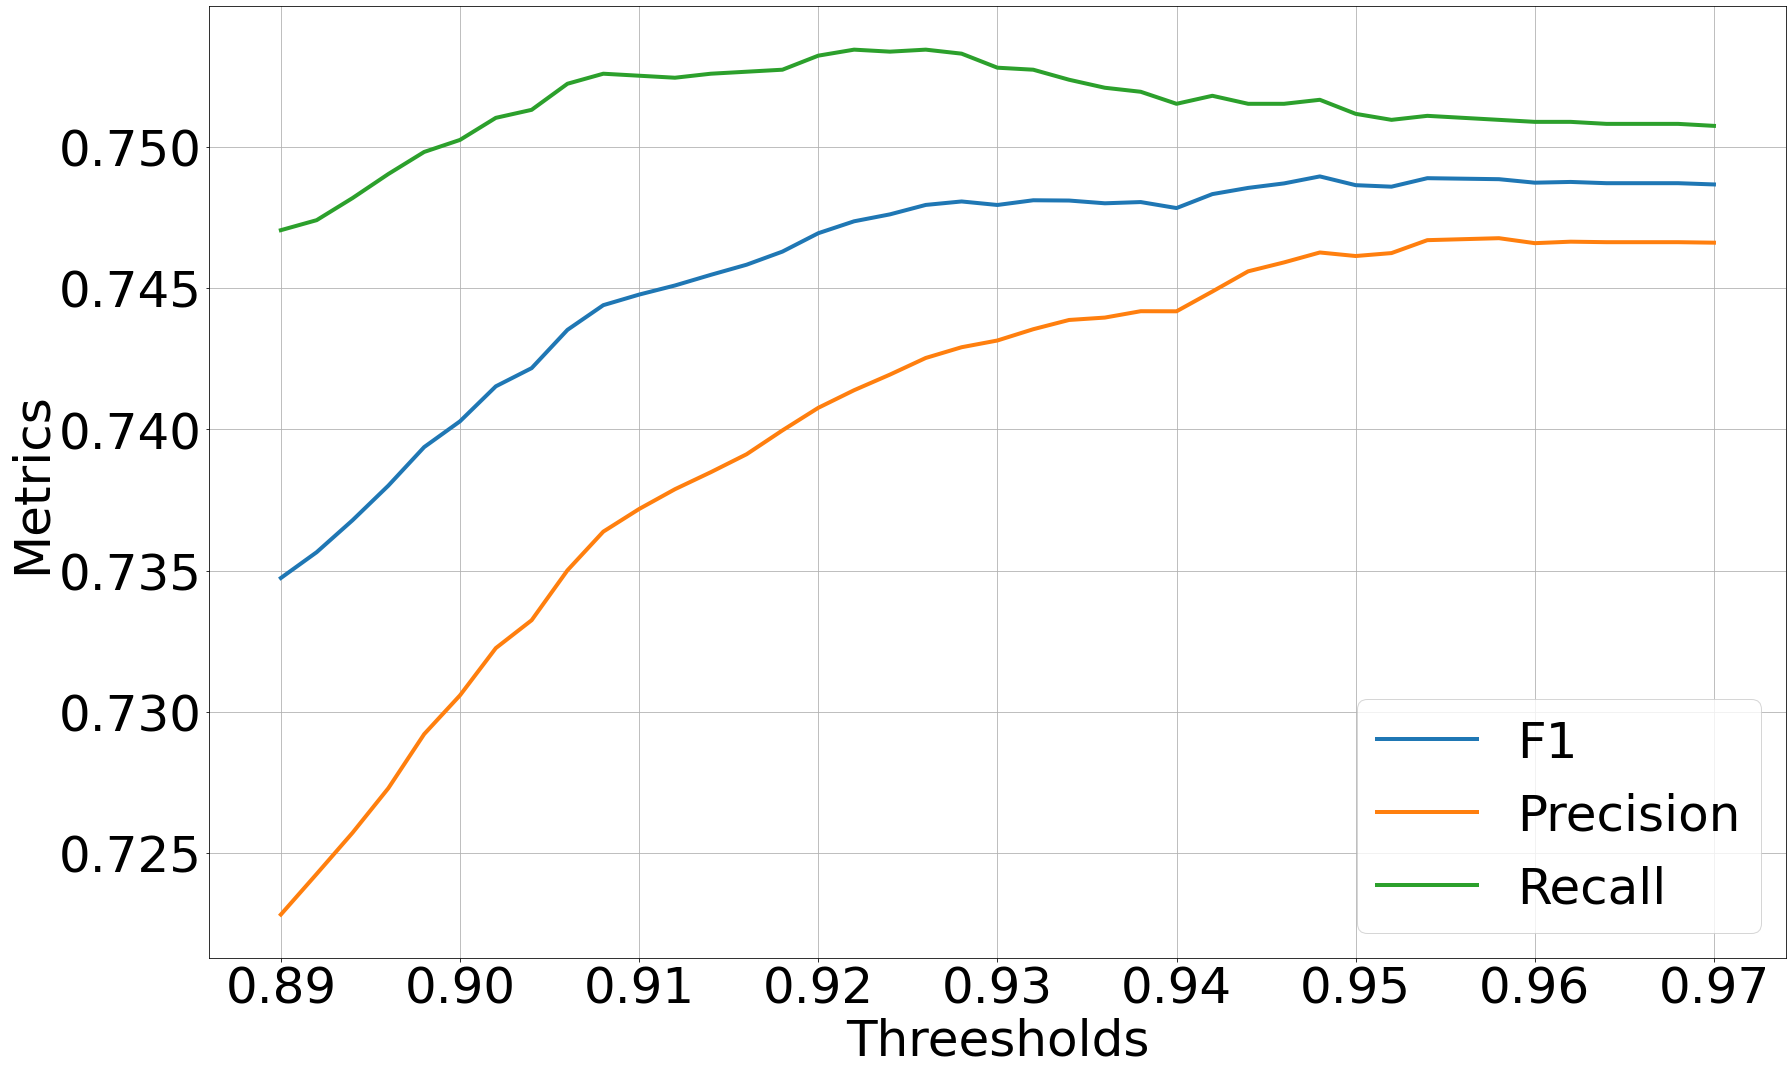

In [31]:
import math
import matplotlib.pyplot as plt
def make_plot():
    plt.figure(figsize=(25,15))
    plt.plot(cosine_threesholds, f1_scores,  label="F1", linewidth=4)
    plt.plot(cosine_threesholds, precision_scores, label="Precision", linewidth=4)
    plt.plot(cosine_threesholds, recall_scores, label="Recall", linewidth=4)
    plt.xlabel('Threesholds', fontsize=50)
    plt.ylabel("Metrics", fontsize=50)
    plt.legend(fontsize=50)
    plt.xticks(fontsize=50)
    plt.yticks(fontsize=50)
    plt.grid()
    plt.tight_layout()
    plt.savefig('scores_with_threeshold.pdf')
    plt.show()
    
make_plot()

## Using The optimal cosine similarity on test data

In [32]:
optimal_threeshold = 0.946 #0.92
prob_threeshold = 0.6 #0.7
new_labels = []
for yhat1, yhat2, cosine, prob in zip(test_mention_classification_preds_coder['Ensemble Labels'], 
                                test_nn_classification_preds_coder['Predicted Label'], 
                                test_nn_classification_preds_coder['Cosine Similarity'],
                                test_mention_classification_preds_coder['Ensemble Prob']):
    
    if yhat1 == yhat2:
        new_labels.append(yhat1)
    else:
        if cosine > optimal_threeshold and prob < prob_threeshold:
            new_labels.append(yhat2)
        else:
            new_labels.append(yhat1) 

test_mention_classification_preds_coder['New Labels'] = new_labels

x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(test_mention_classification_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        yseq.append(seq['Gold Label'])
        yseq_hat.append(seq['New Labels'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:28, 9660.53it/s]


                                     precision    recall  f1-score   support

               anatomical_structure      0.603     0.578     0.590      3768
                          bacterium      0.709     0.679     0.694       449
                  biologic_function      0.657     0.685     0.671      8102
biomedical_occupation_or_discipline      0.477     0.423     0.449       196
                     body_substance      0.642     0.703     0.671       212
                        body_system      0.689     0.348     0.463        89
                           chemical      0.714     0.796     0.753      7396
                 clinical_attribute      0.645     0.613     0.629       323
                          eukaryote      0.696     0.749     0.721      1748
                            finding      0.521     0.347     0.417      3209
                               food      0.563     0.472     0.514       322
               health_care_activity      0.585     0.609     0.597      478

In [33]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# LSTM Mention Detection Model Results

## CODER LSTM

### Train Data

In [34]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(train_mention_detection_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        if seq['Gold Label'] == 'O':
            yseq.append(seq['Gold Label'])
        else:
            yseq.append(seq['Gold Label'][:2]+'Entity')
        yseq_hat.append(seq['Detection Prediction'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:10, 9254.73it/s]


              precision    recall  f1-score   support

      Entity      0.770     0.757     0.764     14082

   micro avg      0.770     0.757     0.764     14082
   macro avg      0.770     0.757     0.764     14082
weighted avg      0.770     0.757     0.764     14082



### Test Data

In [35]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(test_mention_detection_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        if seq['Gold Label'] == 'O':
            yseq.append(seq['Gold Label'])
        else:
            yseq.append(seq['Gold Label'][:2]+'Entity')
        yseq_hat.append(seq['Detection Prediction'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:29, 9267.09it/s]


              precision    recall  f1-score   support

      Entity      0.711     0.695     0.703     40099

   micro avg      0.711     0.695     0.703     40099
   macro avg      0.711     0.695     0.703     40099
weighted avg      0.711     0.695     0.703     40099



In [36]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

## SciBERT LSTM

### Train Data

In [37]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(train_mention_detection_preds_scibert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        if seq['Gold Label'] == 'O':
            yseq.append(seq['Gold Label'])
        else:
            yseq.append(seq['Gold Label'][:2]+'Entity')
        yseq_hat.append(seq['Detection Prediction'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

93158it [00:10, 9160.50it/s]


              precision    recall  f1-score   support

      Entity      0.743     0.758     0.751     14082

   micro avg      0.743     0.758     0.751     14082
   macro avg      0.743     0.758     0.751     14082
weighted avg      0.743     0.758     0.751     14082



### Test Data

In [38]:
x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []
for idx, seq in tqdm(test_mention_detection_preds_scibert.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        if seq['Gold Label'] == 'O':
            yseq.append(seq['Gold Label'])
        else:
            yseq.append(seq['Gold Label'][:2]+'Entity')
        yseq_hat.append(seq['Detection Prediction'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:29, 9264.53it/s]


              precision    recall  f1-score   support

      Entity      0.694     0.708     0.701     40099

   micro avg      0.694     0.708     0.701     40099
   macro avg      0.694     0.708     0.701     40099
weighted avg      0.694     0.708     0.701     40099



In [39]:
print("{0:35} {1:40} {2:40}".format('Token', 'Gold', 'Prediction'))
print("{0:35} {1:40} {2:40}".format('_____', '____', '__________'))

for x_, y_sample, yhat_sample in zip(x[2021], y[2021], yhat[2021]):
    print("{0:35} {1:40} {2:40}".format(x_, y_sample, yhat_sample))  

Token                               Gold                                     Prediction                              
_____                               ____                                     __________                              
in                                  O                                        O                                       
fact                                O                                        O                                       
,                                   O                                        O                                       
both                                O                                        O                                       
the                                 O                                        O                                       
resistive                           O                                        O                                       
and                                 O                   

## Ensemble the Two detection models

In [40]:
lstm_ensemble_labels, prob_ensemble_labels = [], []
for yhat1, yhat2, prob1, prob2 in zip(test_mention_detection_preds_coder['Detection Prediction'], 
                                      test_mention_detection_preds_scibert['Detection Prediction'],
                                      test_mention_detection_preds_coder['Detect Prob'], 
                                      test_mention_detection_preds_scibert['Detect Prob']):
    if yhat1 == yhat2:
        lstm_ensemble_labels.append(yhat1)
        prob_ensemble_labels.append(max([prob1, prob2]))
    else:
        argmax = np.argmax([prob1, prob2])
        if argmax == 0:
            lstm_ensemble_labels.append(yhat1)
            prob_ensemble_labels.append(prob1)
        else:
            lstm_ensemble_labels.append(yhat2)
            prob_ensemble_labels.append(prob2)

In [41]:
test_mention_detection_preds_coder['Ensemble Labels'] = lstm_ensemble_labels
test_mention_detection_preds_coder['Ensemble Prob'] = prob_ensemble_labels

x, y, yhat = [], [], []
xseq, yseq, yseq_hat = [], [], []

for idx, seq in tqdm(test_mention_detection_preds_coder.iterrows()):
    if seq['Tokens'] not in ['[SEP]', '[CLS]']:
        if seq['Gold Label'] == 'O':
            yseq.append(seq['Gold Label'])
        else:
            yseq.append(seq['Gold Label'][:2]+'Entity')
        yseq_hat.append(seq['Ensemble Labels'])
        xseq.append(seq['Tokens'])
    else:
        if seq['Tokens'] == '[SEP]':
            y.append(yseq)
            yhat.append(yseq_hat)
            x.append(xseq)
        elif seq['Tokens'] == '[CLS]':
            xseq, yseq, yseq_hat = [], [], []
            
print(classification_report(y, yhat, digits=3, mode='strict', scheme=IOB2))

270657it [00:30, 8963.42it/s]


              precision    recall  f1-score   support

      Entity      0.717     0.709     0.713     40099

   micro avg      0.717     0.709     0.713     40099
   macro avg      0.717     0.709     0.713     40099
weighted avg      0.717     0.709     0.713     40099

